In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.sparse.csgraph import shortest_path
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import scipy
import scipy.io
import math

In [2]:
data = scipy.io.loadmat('isomap.mat')['images'].T   #From Ed discussion

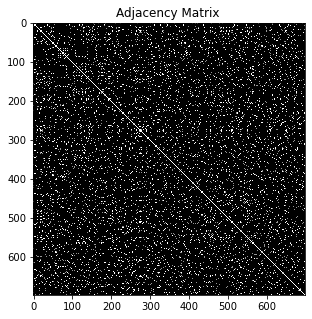

In [3]:
# REFERENCE: https://m0nads.wordpress.com/2019/08/16/simple-k-nearest-neighbors-using-partial-sort/
# Build Graph A using nearest neigbors
A = cdist(data,data,metric = 'euclidean')  #From Ed Discussion for distance between  points using Euclidean distance 
k = 50  #set number of neighbors
for i in range(A.shape[0]):  
    nearest_partition = np.partition(A[i],k+1, axis = 0) 
    for j in range(A.shape[1]):
        if A[i,j] <= nearest_partition[k]:  
            A[i,j] = A[i,j]
        else:
            A[i,j] = 1000000000   
A = (A + A.T)/2            
# visualize the adjacency matrix
plt.figure(figsize=(5, 5)) 
plt.title ("Adjacency Matrix ")
plt.imshow(A,cmap="Greys",interpolation="none")

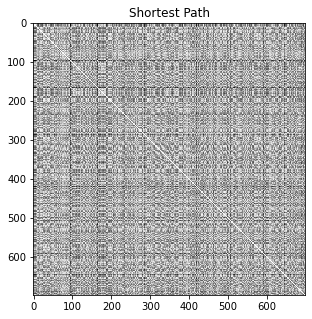

In [4]:
# Step 2: Find the shortest path distance matrix 
D = shortest_path(A, method = 'auto', directed=False)  #From Ed discussion
plt.figure(figsize=(5, 5)) 
plt.title ("Shortest Path")
plt.imshow(D,cmap="Greys",interpolation="none")

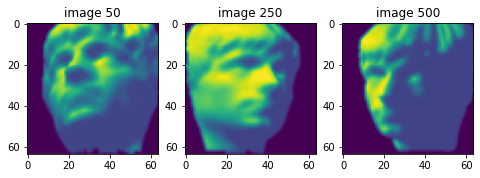

In [5]:
#Plot a few random images
list_img= [50,250, 500]
plt.figure(figsize=(8,8))
for i in list_img:
        f = np.reshape(data[i,:],(64,64)).T #turn the data to its original form
        plt.subplot(1,3,list_img.index(i)+1)
        plt.title("image " + str(i))
        plt.imshow(f)

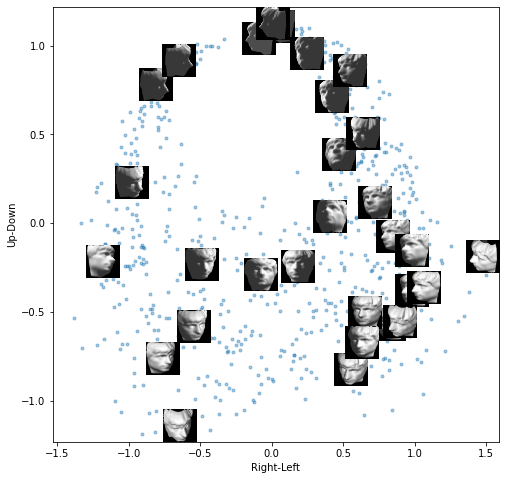

In [6]:
m = data.shape[0] 
H = np.identity(m) - np.ones((m,m))/m  
C = (-1/(2*m))*((H.dot(np.square(D))).dot(H))

# compute leading eigenvalues and eigenvectors
eigenval, eigenvec = np.linalg.eigh(C)
eigenval = eigenval.real
eigenvec = eigenvec.real

eigenval = eigenval[np.argsort(eigenval)] #SORT eigenvalue and eigenvector
eigenvec = eigenvec[:,np.argsort(eigenval)]

dim1 = eigenvec[:,-1] * math.sqrt(eigenval[-1])
dim2 = eigenvec[:,-2] * math.sqrt(eigenval[-2])

# PLOT ISOMAP REFERENCE FROM http://benalexkeen.com/isomap-for-dimensionality-reduction-in-python/

fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

# Show 30 of the images ont the plot
x_size = (max(dim1) - min(dim1)) * 0.08
y_size = (max(dim2) - min(dim2)) * 0.08
for i in range(30):
    img_num = np.random.randint(0, 698)
    x0 = dim1[img_num] - (x_size / 2.)
    y0 = dim2[img_num] - (y_size / 2.)
    x1 = dim1[img_num] + (x_size / 2.)
    y1 = dim2[img_num] + (y_size / 2.)
    img = data[img_num,:].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))
# Show 2D components plot
ax.scatter(dim1,dim2, marker='.',alpha=0.4)
ax.set_ylabel('Up-Down')
ax.set_xlabel('Right-Left')
plt.show()

PART B

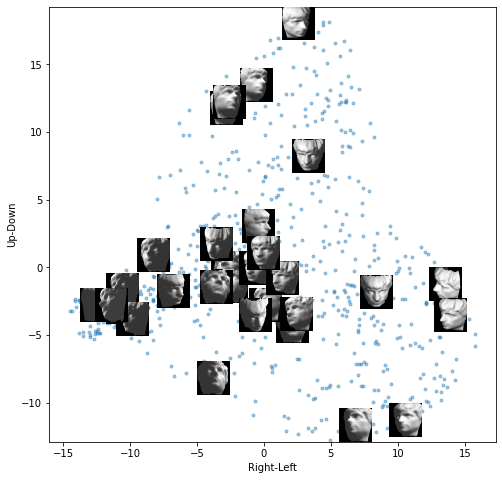

In [7]:
# REFERENCE for PCA PLOT: http://benalexkeen.com/isomap-for-dimensionality-reduction-in-python/

# apply PCA
pca = PCA(n_components = 2)
pca.fit(data)
X1 = pca.transform(data)
dim1x = X1[:, 0]
dim2x = X1[:, 1]

fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)
# Show images on the plot
x_size = (max(dim1x) - min(dim1x)) * 0.08
y_size = (max(dim2x) - min(dim2x)) * 0.08

for i in range(30):
    img_num = np.random.randint(0, 698)
    x0 = dim1x[img_num] - (x_size / 2.)
    y0 = dim2x[img_num] - (y_size / 2.)
    x1 = dim1x[img_num] + (x_size / 2.)
    y1 = dim2x[img_num] + (y_size / 2.)
    img = data[img_num,:].reshape(64, 64).T
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(dim1x, dim2x, marker='.',alpha=0.4)
ax.set_ylabel('Up-Down')
ax.set_xlabel('Right-Left')

plt.show()